# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [10]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [57]:
resource_url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
headers = {'user-agent':"My Web Scrapper 1.0"}

# Petición para descargar el fichero de Internet
response = requests.get(resource_url,timeout=time.sleep(10),headers=headers)

# Si la petición se ha ejecutado correctamente (código 200), entonces el contenido HTML de la página se ha podido descargar
if response:
    # Transformamos el HTML plano en un HTML real (estructurado y anidado, con forma de árbol)
    soup = BeautifulSoup(response.text, 'html')
    table = soup.find("table")
    body = table.find("tbody")
    tr = body.find_next("tr")
    ths = tr.find_all('th')
    columns = []
    rows = []
    for x in ths:
        columns.append(x.text)
    trs = body.find_all_next("tr")
    count = 0
    for y in trs:
        if count >= 101:
            break
        tds = y.find_all(['td','th'])
        row = []
        for z in tds:
            row.append(z.text)
        if len(row) == 0:
            continue
        if len(row) == len(columns):
            rows.append(row)

        count += 1
    df = pd.DataFrame(rows,columns=columns)
    display(df)
    df.columns = df.columns.str.lower()
    df.drop(0)
    #df = pd.read_html(table)
    #df.sample(10)
else:
    print("Error")
# Petición para descargar el fichero de Internet)

,Rank\n,Song\n,Artist(s)\n,Streams(billions)\n,Release date\n,Ref.\n
0,Rank\n,Song\n,Artist(s)\n,Streams(billions)\n,Release date\n,Ref.\n
1,1\n,"""Blinding Lights""\n",The Weeknd,5.040,29 November 2019,[1]\n
2,2\n,"""Shape of You""\n",Ed Sheeran,4.564,6 January 2017,[2]\n
3,3\n,"""Starboy""\n",The Weeknd and Daft Punk,4.106,21 September 2016,[3]\n
4,4\n,"""Someone You Loved""\n",Lewis Capaldi,4.063,8 November 2018,[4]\n
...,...,...,...,...,...,...
96,96\n,"""Levitating""\n",Dua Lipa and DaBaby,2.418,1 October 2020,[96]\n
97,97\n,"""Jocelyn Flores""\n",XXXTentacion,2.417,31 October 2017,[97]\n
98,98\n,"""Sweet Child O' Mine""\n",Guns N' Roses,2.416,3 June 1988,[98]\n
99,99\n,"""Clean Baby Sleep White Noise (Loopable)""\n",Dream Supplier,2.409,29 April 2020,\n


In [58]:
df.columns = df.columns.str.replace("\n","").str.replace(" ","_")
df.columns = df.columns.str.replace("(","").str.replace(")","")
df = df.drop(columns="ref.")
df = df.drop(0)
df["rank"] = df["rank"].str.replace("\n","")
df["song"] = df["song"].str.replace("\n","").str.replace("\"","")
df["streamsbillions"] = df["streamsbillions"].str.replace(".","")
df["streamsbillions"] = df["streamsbillions"].astype("int")
df

,rank,song,artists,streamsbillions,release_date
1,1,Blinding Lights,The Weeknd,5040,29 November 2019
2,2,Shape of You,Ed Sheeran,4564,6 January 2017
3,3,Starboy,The Weeknd and Daft Punk,4106,21 September 2016
4,4,Someone You Loved,Lewis Capaldi,4063,8 November 2018
5,5,As It Was,Harry Styles,4048,1 April 2022
...,...,...,...,...,...
96,96,Levitating,Dua Lipa and DaBaby,2418,1 October 2020
97,97,Jocelyn Flores,XXXTentacion,2417,31 October 2017
98,98,Sweet Child O' Mine,Guns N' Roses,2416,3 June 1988
99,99,Clean Baby Sleep White Noise (Loopable),Dream Supplier,2409,29 April 2020


In [59]:
conn = sqlite3.connect("spotify_top_songs.db")

In [60]:
df.to_sql("most_streamed", conn, if_exists="replace", index=False)
cursor = conn.cursor()

In [61]:
cursor.execute("SELECT COUNT(*) FROM most_streamed")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()

Rows inserted: 100


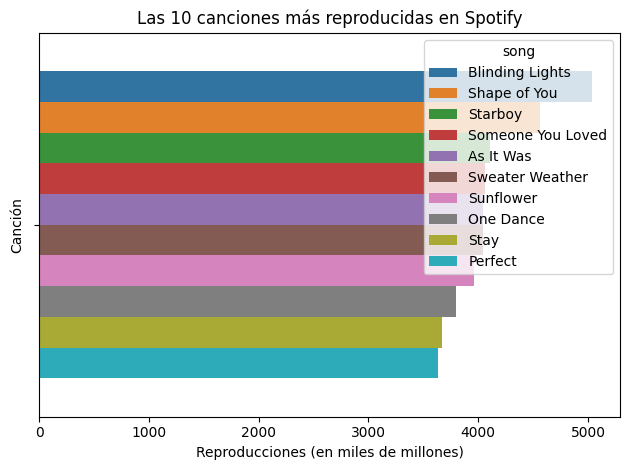

In [63]:
# Graficar los datos

# Gráfico 1: Las 10 canciones más reproducidas
top10 = df.nlargest(10, "streamsbillions")
sns.barplot(data=top10, x="streamsbillions",hue="song")
plt.title("Las 10 canciones más reproducidas en Spotify")
plt.xlabel("Reproducciones (en miles de millones)")
plt.ylabel("Canción")
plt.tight_layout()
plt.show()